In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from helper import laplace_solution, l2_norm, plot_3d

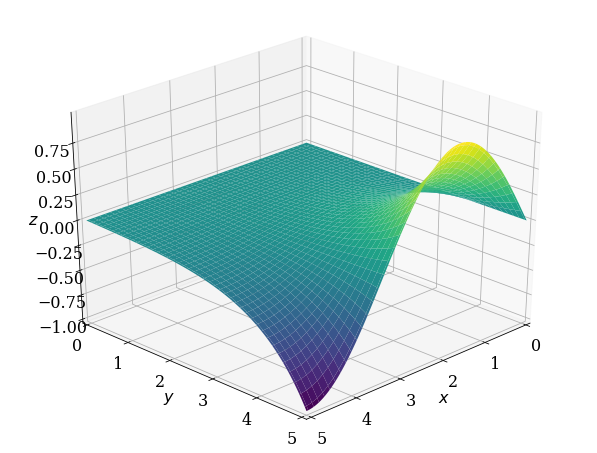

In [4]:
nx, ny = 128, 128
Lx, Ly = 5.0, 5.0
dx = Lx / (nx - 1)  # grid spacing in x direction
dy = Ly / (ny - 1)  # grid spacing in y direction

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

p_exact = laplace_solution(x, y, Lx, Ly)
plot_3d(x, y, p_exact)

In [5]:
def laplace2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        
        # Update the solution at interior points.
        p[1:-1, 1:-1] = 0.25*(pn[:-2, 1:-1] + pn[1:-1, :-2] + 
                              pn[1:-1, 2:] + pn[2:, 1:-1])
        
        # 2nd-order Neuman ncondition (zero-gradient) at the right boundary
        p[1:-1, -1] = 0.25*(pn[:-2, -1] + 2*pn[1:-1, -2] + pn[2:,-1])
        
        # Compute the relative L2-norm of the difference
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv        

In [6]:
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5*numpy.pi*x/Lx)

In [7]:
%%time
p, ites, conv = laplace2d_jacobi(p0, rtol=1e-8)
print(ites, conv[-1])

19993 9.998616841297023e-09
CPU times: user 4.22 s, sys: 0 ns, total: 4.22 s
Wall time: 4.21 s


In [8]:
def laplace2d_jacobi_2(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range (1, ny-1):
            for i in range (1, nx-1):
                # Update the solution at interior points.
                p[j, i] = 0.25*(pn[j-1, i] + pn[j, i-1] + 
                              pn[j, i+1] + pn[j+1, i])
        for j in range (1, ny-1):
            # 2nd-order Neuman ncondition (zero-gradient) at the right boundary
            p[j, -1] = 0.25*(pn[j-1, -1] + 2*pn[j, -2] + pn[j+1,-1])

        # Compute the relative L2-norm of the difference
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv   

In [9]:
%%time
p, ites, conv = laplace2d_jacobi(p0, maxiter =500)
print(ites, conv[-1])

500 0.000656396769336848
CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 106 ms


In [10]:
%%time
p, ites, conv = laplace2d_jacobi_2(p0, maxiter =500)
print(ites, conv[-1])

500 0.000656396769336848
CPU times: user 8.15 s, sys: 0 ns, total: 8.15 s
Wall time: 8.14 s


In [11]:
11.2e+3/137

81.75182481751825

In [12]:
def laplace2d_gauss_seidel(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range (1, ny-1):
            for i in range (1, nx-1):
                # Update the solution at interior points.
                p[j, i] = 0.25*(p[j-1, i] + p[j, i-1] + 
                              pn[j, i+1] + pn[j+1, i])
        for j in range (1, ny-1):
            # 2nd-order Neuman ncondition (zero-gradient) at the right boundary
            p[j, -1] = 0.25*(p[j-1, -1] + 2*p[j, -2] + p[j+1,-1])

        # Compute the relative L2-norm of the difference
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv   

In [13]:
%%time
p, ites, conv = laplace2d_gauss_seidel(p0, maxiter =500)
print(ites, conv[-1])

500 0.0005920237170650388
CPU times: user 8.16 s, sys: 4 ms, total: 8.17 s
Wall time: 8.17 s


In [14]:
%%time
p, ites, conv = laplace2d_jacobi_2(p0, maxiter =500)
print(ites, conv[-1])

500 0.000656396769336848
CPU times: user 8.14 s, sys: 4 ms, total: 8.15 s
Wall time: 8.15 s


In [21]:
import numba

In [22]:
from numba import jit

In [23]:
def fib(n):
    a, b = 1, 1
    for i in range (n-2):
        a, b = b, a+b
        return b

In [24]:
fib(3)

2

In [25]:
%%timeit
fib(500000)

587 ns ± 6.97 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [26]:
@jit
def fib(n):
    a, b = 1, 1
    for i in range (n-2):
        a, b = b, a+b
        return b

In [27]:
%%timeit
fib(500000)

215 ns ± 1.02 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [28]:
@jit
def laplace2d_jacobi_jit(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range (1, ny-1):
            for i in range (1, nx-1):
                # Update the solution at interior points.
                p[j, i] = 0.25*(pn[j-1, i] + pn[j, i-1] + 
                              pn[j, i+1] + pn[j+1, i])
        for j in range (1, ny-1):
            # 2nd-order Neuman ncondition (zero-gradient) at the right boundary
            p[j, -1] = 0.25*(pn[j-1, -1] + 2*pn[j, -2] + pn[j+1,-1])

        # Compute the relative L2-norm of the difference
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv  

In [30]:
%%timeit
p, ites, conv = laplace2d_jacobi_jit(p0, maxiter=100)

8.13 ms ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit
p, ites, conv = laplace2d_jacobi_2(p0, maxiter=100)

1.72 s ± 91.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
1.72e3/8.1

212.3456790123457

In [33]:
%%timeit
p, ites, conv = laplace2d_jacobi(p0, maxiter=100)

20.8 ms ± 492 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
@jit
def laplace2d_gauss_seidel_jit(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn = p.copy()
        for j in range (1, ny-1):
            for i in range (1, nx-1):
                # Update the solution at interior points.
                p[j, i] = 0.25*(p[j-1, i] + p[j, i-1] + 
                              pn[j, i+1] + pn[j+1, i])
        for j in range (1, ny-1):
            # 2nd-order Neuman ncondition (zero-gradient) at the right boundary
            p[j, -1] = 0.25*(p[j-1, -1] + 2*p[j, -2] + p[j+1,-1])

        # Compute the relative L2-norm of the difference
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        ite += 1
    return p, ite, conv

In [36]:
%%timeit
p, ites, conv = laplace2d_gauss_seidel_jit(p0, maxiter=100)

15.9 ms ± 74 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
p, ites, conv = laplace2d_jacobi_jit(p0, rtol=1e-8)
print(ites, conv[-1])

19993 9.998616841297063e-09


In [38]:
p, ites, conv = laplace2d_gauss_seidel_jit(p0, rtol=1e-8)
print(ites, conv[-1])

13939 9.997635652645034e-09


In [40]:
@jit
def laplace2d_sor_jit(p0, omega, maxiter=20000, rtol=1e-6):
    p=p0.copy()
    ny, nx = p.shape
    ite = 0
    rdiff = rtol + 1.0
    conv = []
    while rdiff > rtol and ite < maxiter:
        pn=p.copy()
        for j in range (1, ny-1):
            for i in range (1, nx-1):
                p[j,i] = ((1-omega)*pn[j,i] +
                omega*0.25*(p[j-1,i] + 
                           p[j, i-1] + 
                           pn[j, i+1] + 
                           pn[j+1, i]))
        for j in range(1, ny-1):
            p[j,-1] = 0.25*(p[j-1, -1] + 2*p[j, -2] + p[j+1, -1])
        rdiff = numpy.sqrt(numpy.sum((p-pn)**2)/numpy.sum(pn**2))
        conv.append(rdiff)
        ite +=1
    return p, ite, conv

In [41]:
p, ites, conv = laplace2d_sor_jit(p0, 1.5, rtol=1e-8)
print(ites, conv[-1])

7108 9.991011445888561e-09


In [42]:
omega = 2/(1+numpy.pi/nx)
p, ites, conv = laplace2d_sor_jit(p0, omega, rtol=1e-8)
print(ites, conv[-1])

1110 9.964283920198975e-09


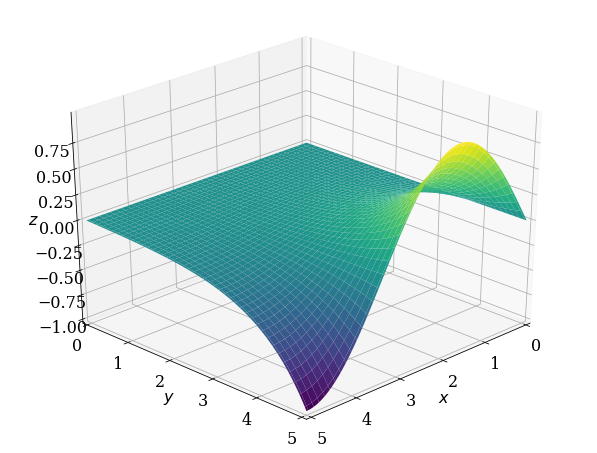

In [43]:
plot_3d(x, y, p)